In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

<h3>Leitura dos dados: Verifica 1 e Verifica 3</h3>

In [2]:
df = pd.read_csv('conhecimento.csv')

df1 = df[df.verifica==1].copy().reset_index(drop=True)
df3_full = df[df.verifica==3].copy().reset_index(drop=True)

ids_3 = np.random.choice(df3_full.id, len(df1), replace=False)
df3 = df[df.id.isin(ids_3)].copy().reset_index(drop=True)

<h3>Definição das funções usadas</h3>

In [5]:
def gera_sumario(df):
    dados = []
    for c in cols:
        d = df[c]
        
        dados.append([
            c, # coluna
            d.mean(),   # media
            d.median(), # mediana
            d.std()**2, # variancia
            d.std(),    # std
        ])
    sumario = pd.DataFrame(dados, columns=['coluna', 'media', 'mediana', 'variancia', 'std'])
    sumario = sumario.sort_values('std', ascending=False).copy().reset_index(drop=True)
    return sumario
cols = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3',
       'medianb4', 'medianb5', 'medianb6', 'medianb7']

<h3>Estatistica básica, ordenada pelo Desvio padrão(std)</h3>

In [6]:
sumario1 = gera_sumario(df1)
sumario1

,coluna,media,mediana,variancia,std
0,medianb6,0.621125,0.233781,11.797833,3.434797
1,dif_dnbrl,0.248001,0.221400,0.014324,0.119682
2,dif_ndvi,0.173211,0.155019,0.008907,0.094378
3,nbrl,0.011152,0.009293,0.006253,0.079079
4,ndvi,0.226356,0.224413,0.003595,0.059957
5,medianb7,0.185466,0.183199,0.003146,0.056094
6,medianb5,0.188681,0.188654,0.002306,0.048024
7,medianb4,0.117826,0.114774,0.001087,0.032972
8,medianb3,0.099383,0.096094,0.000519,0.022776
9,medianb2,0.109385,0.106015,0.000305,0.017468


In [7]:
sumario3 = gera_sumario(df3)
sumario3

,coluna,media,mediana,variancia,std
0,medianb6,0.429499,0.296350,2.458867,1.568078
1,dif_dnbrl,0.290561,0.280125,0.012241,0.110638
2,dif_ndvi,0.233801,0.223712,0.009243,0.096139
3,nbrl,0.174658,0.169720,0.009172,0.095769
4,ndvi,0.314544,0.309641,0.007393,0.085980
5,medianb5,0.294977,0.290418,0.004351,0.065963
6,medianb7,0.209189,0.202143,0.003421,0.058490
7,medianb4,0.156387,0.151131,0.002566,0.050660
8,medianb3,0.143794,0.138785,0.002100,0.045821
9,medianb2,0.146009,0.138784,0.001770,0.042067


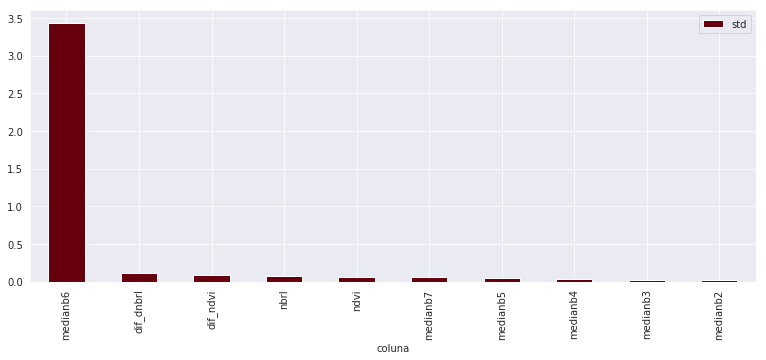

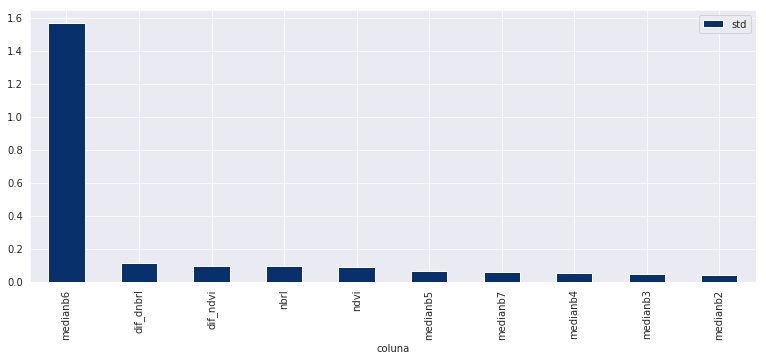

In [12]:
sumario1.plot(x="coluna", y=['std'], kind="bar", colormap='Reds_r', figsize=(13,5))
sumario3.plot(x="coluna", y=['std'], kind="bar", colormap='Blues_r', figsize=(13,5))

<h3>Conclusão</h3>
<pre>
- O atributo <b>medianb6</b> é o atributo com a maior variancia entre os valores mostrados
- O mais com a maior variancia é considerado o mais <b>heterogêneo</b> e o com menor é o mais 
  <b>homogêneo</b>.
- Não consegui comparar uma variancia com a outra, devido que os valores não estão na mesma escala
- Uma possível solução é a normalização dos dados, para deixa-los na mesma escala.
</pre>